### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

#### 무대뽀로 하기 힘들다면? 다음 Hint와 함께 시도해 봅시다:

1. 데이터를 톺아봅시다.
- 각 데이터는 어떤 자료형을 가지고 있나요?
- 데이터에 **결측치**는 없나요? -> 있다면 이를 어떻게 메꿔줄까요?
- 데이터의 자료형을 바꿔줄 필요가 있나요? -> 범주형의 One-hot encoding
2. 데이터에 대한 가설을 세워봅시다.
- 가설은 개인의 경험에 의해서 도출되어도 상관이 없습니다.
- 가설은 명확할 수록 좋습니다.
3. 가설을 검증하기 위한 증거를 찾아봅시다.
- 이 증거는 한 눈에 보이지 않을 수 있습니다. 우리가 다룬 여러가지 Technique를 써줘야합니다.
- `.groupby()`를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까요?
- `merge()`를 통해서 두개 이상의 dataFrame을 합치면 어떨까요?
- 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [37]:
exame_df = pd.read_csv("./StudentsPerformance.csv")

exame_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### 가설 l. 수학 점수는 남학생의 경우가 더 높을 것이다.

- 수학점수의 경우 남학생이 여학생에 비해 높은 점수를 받은것을 확인할 수 있다.

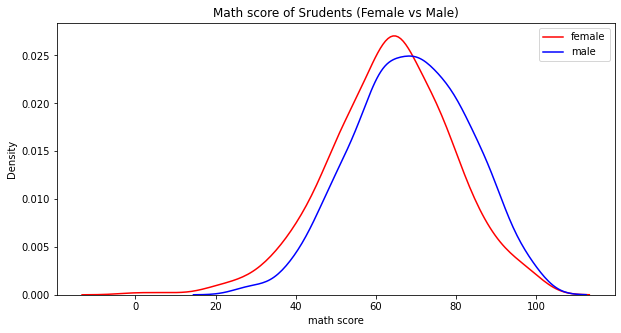

In [156]:
# Math Score 비교
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(exame_df.loc[(exame_df['gender'] == 'female'), 'math score'], ax=ax, color = 'r')
sns.kdeplot(exame_df.loc[(exame_df['gender'] == 'male'), 'math score'], ax=ax, color = 'b')

plt.title("Math score of Srudents (Female vs Male)")
 
plt.legend(['female', 'male'])
    
plt.show()

### 가설 ll. 언어영역(Read/ Write) 점수는 여학생의 경우가 더 높을 것이다.
- 언어 영역 Read와 Write 둘 다에서 여학생이 남학생에 비해 더 높은 점수를 받은것을 확인할 수 있다.

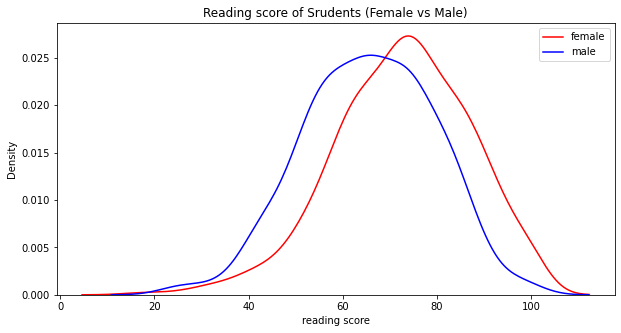

In [157]:
# Reading Score 비교
fig, ax = plt.subplots(1, 1, figsize=(10,5))

sns.kdeplot(exame_df.loc[(exame_df['gender'] == 'female'), 'reading score'], ax=ax, color = 'r')
sns.kdeplot(exame_df.loc[(exame_df['gender'] == 'male'), 'reading score'], ax=ax, color = 'b')
 
plt.title("Reading score of Srudents (Female vs Male)")

plt.legend(['female', 'male'])
    
plt.show()

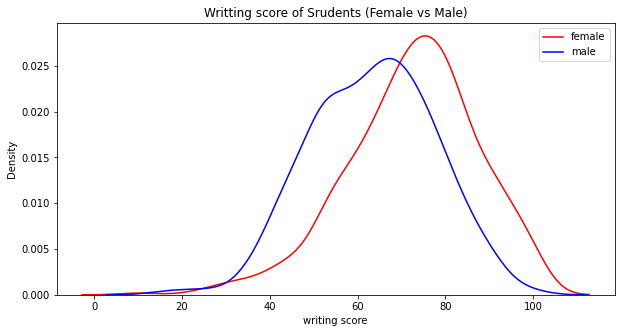

In [158]:
# Writing Score 비교
fig, ax = plt.subplots(1, 1, figsize=(10,5))

sns.kdeplot(exame_df.loc[(exame_df['gender'] == 'female'), 'writing score'], ax=ax, color = 'r')
sns.kdeplot(exame_df.loc[(exame_df['gender'] == 'male'), 'writing score'], ax=ax, color = 'b')
 
plt.title("Writting score of Srudents (Female vs Male)")    
    
plt.legend(['female', 'male'])
    
plt.show()

In [121]:
# Reading Score 와 Writing Score의 합의 평균
exame_df['average_rw'] = (exame_df['reading score'] + exame_df['writing score'])/2
exame_df['average_rw']

0      73.0
1      89.0
2      94.0
3      50.5
4      76.5
       ... 
995    97.0
996    55.0
997    68.0
998    77.5
999    86.0
Name: average_rw, Length: 1000, dtype: float64

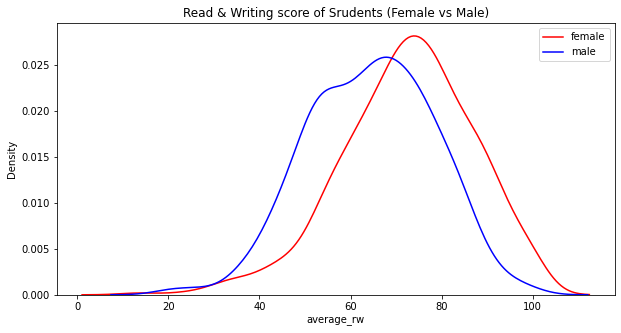

In [159]:
# Reading Score & Writing Score의 비교
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(exame_df.loc[exame_df.gender == "female"]['average_rw'], ax=ax, color = 'r')
sns.kdeplot(exame_df.loc[exame_df.gender == "male"]['average_rw'], ax=ax, color = 'b')
 
plt.title("Read & Writing score of Srudents (Female vs Male)")    
    
plt.legend(['female', 'male'])
    
plt.show()

### 가설 lll. 환경적 요인과 유전적 요인을 생각했을 때, 부모의 학위가 높은 학생일수록 점수가 더 높을 것이다.
- 높은 점수 부분으로 갈수록 부모님의 학위가 높은 학생이 점수가 더 높은것을 확인할 수 있었다.
- 낮은 점수 부분에서도, 높은 점수 부분에서도 전반적으로 부모님의 학위가 높은 학생의 경우가 그렇지 못한 학생에 비해 점수가 높은 것을 확인할 수 있었다.

In [133]:
# Math, Reading, Writing Score의 합산 점수
exame_df['total score'] = exame_df['math score'] + exame_df['reading score'] + exame_df['writing score']

exame_df['total score']

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total score, Length: 1000, dtype: int64

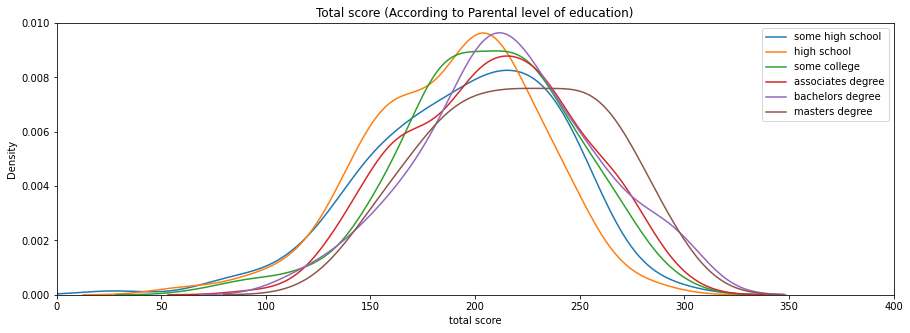

In [140]:
#parental level of education에 따른 Math, Reading, Writing Score의 합산 점수

# level of education의 순서
# some high school  -> high school -> some college -> associate's degree -> bachelor's degree -> master's degree
fig, ax = plt.subplots(1, 1, figsize=(15,5))

plt.axis([0, 400, 0, 0.01]) # [x_min, x_max, y_min, y_max]

sns.kdeplot(exame_df.loc[exame_df["parental level of education"] == "some high school"]['total score'], ax=ax)
sns.kdeplot(exame_df.loc[exame_df["parental level of education"] == "high school"]['total score'], ax=ax)
sns.kdeplot(exame_df.loc[exame_df["parental level of education"] == "some college"]['total score'], ax=ax)
sns.kdeplot(exame_df.loc[exame_df["parental level of education"] == "associate's degree"]['total score'], ax=ax)
sns.kdeplot(exame_df.loc[exame_df["parental level of education"] == "bachelor's degree"]['total score'], ax=ax)
sns.kdeplot(exame_df.loc[exame_df["parental level of education"] == "master's degree"]['total score'], ax=ax)

plt.title("Total score (According to Parental level of education)")   

plt.legend(['some high school ', 'high school', 'some college', 'associates degree', 'bachelors degree', 'masters degree'])
plt.show()

### 가설 lV. Reading 점수가 높은 학생은 Writing점수도 높을것이다.
- Math 점수는 Reading과 Writing 점수와 관련이 없다.
- Reading 과 Writing 점수는 서로 관계가 깊다.

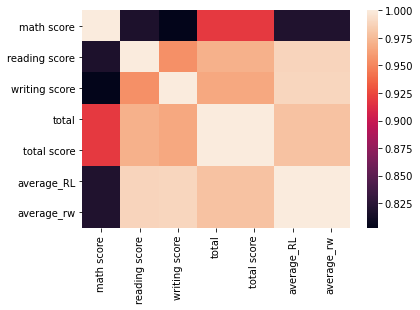

In [149]:
sns.heatmap(exame_df.corr())

plt.show()

### 가설 V. Test preparation course 를 끝마친 학생이 끝내지 않은 학생보다 점수가 높을 것이다.
- Test preparation course를 끝마친 학생의 경우가 Total Score가 더 높음을 알 수 있다.

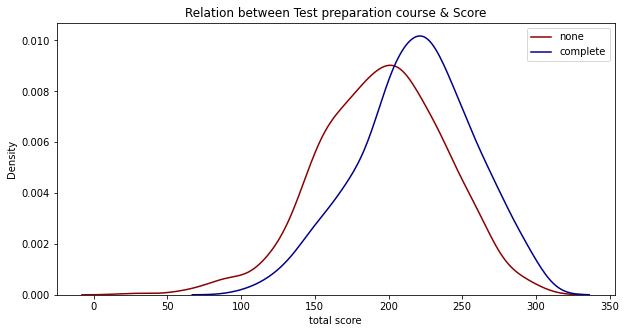

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

sns.kdeplot(exame_df.loc[(exame_df['test preparation course'] == 'none'), 'total score'], color = 'darkred')
sns.kdeplot(exame_df.loc[(exame_df['test preparation course'] == 'completed'), 'total score'], color = 'darkblue')

plt.title("Relation between Test preparation course & Score")

plt.legend(['none', 'complete'])
    
plt.show()